- Pearson's correlation coefficient or Pearson's r
- compare 2 continuous variables

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv("exam_scores.csv")
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


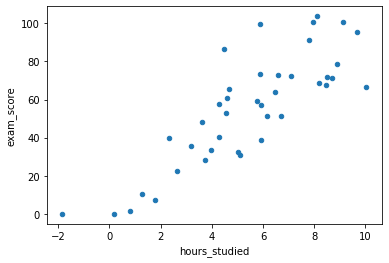

In [3]:
df.plot.scatter(y="exam_score", x="hours_studied")

0. Setup hypoothesis
1. Calculate test stat
2. Find p value from t stat
3. Conclude

- $H_0$: There is no linear relationship between exam score and number of hours studied
- $H_a$: There is a linear relationship between exam score and number of hours studied

In [6]:
x = df.hours_studied
y = df.exam_score